In [ ]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath('../py'))
from notebook_utils import NotebookUtilities

nu = NotebookUtilities(
    data_folder_path=osp.abspath('../data'),
    saves_folder_path=osp.abspath('../saves')
)

In [2]:

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import re
import textwrap

Pretty printing has been turned OFF


In [3]:

generations_df = nu.load_object('generations_df')
turning_numbers_df = nu.load_object('turning_numbers_df')
turnings_df = nu.load_object('turnings_df')
us_presidents_df = nu.load_object('us_presidents_df')

In [4]:

def ball_and_chain(ax, index, values, c, label=None):
    """
    colormap = r()
    cmap = mpl.cm.get_cmap(colormap)
    norm = LogNorm(vmin=values.min(), vmax=values.max())
    ball_and_chain(ax, index, values, c=cmap(norm(values)))
    """
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    if label is None:
        ax.scatter(index, values, s=30, lw=.5, c=c, edgecolors='k', zorder=2)
    else:
        ax.scatter(index, values, s=30, lw=.5, c=c, edgecolors='k', zorder=2, label=label)

C:\Users\daveb\OneDrive\Documents\GitHub\gpt-stuff\gs_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
C:\Users\daveb\OneDrive\Documents\GitHub\gpt-stuff\gs_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
C:\Users\daveb\OneDrive\Documents\GitHub\gpt-stuff\gs_en

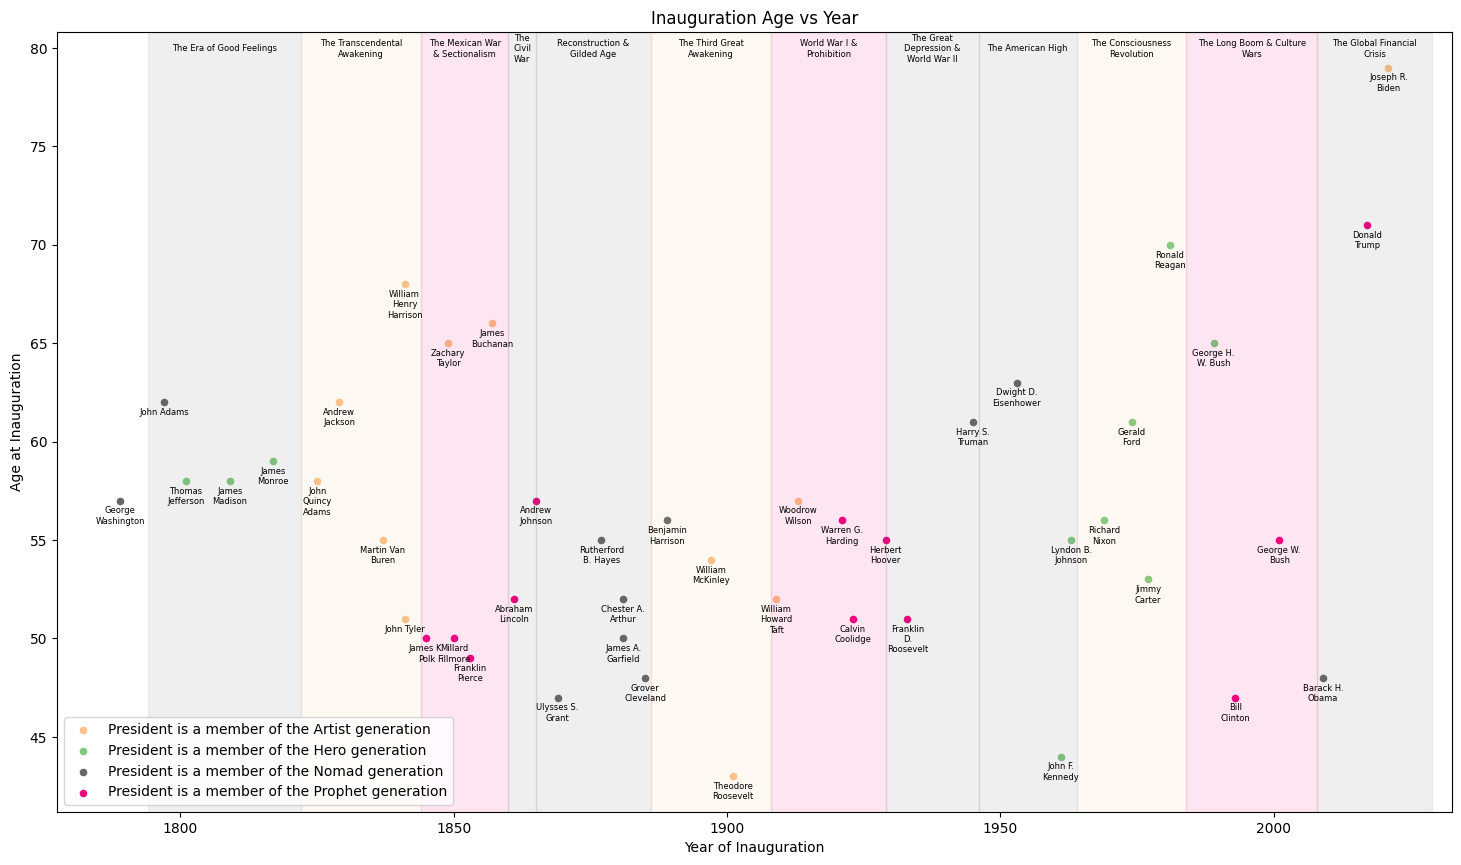

In [5]:

archetype_dict = generations_df.turnings_archetype.to_dict()
columns_list = ['turning_number', 'entering_midlife']
numbers_archetype_dict = turnings_df[columns_list].reset_index().merge(
    generations_df.turnings_archetype.reset_index(), left_on='entering_midlife', right_on='generation_name'
).set_index('turning_number').turnings_archetype.to_dict()
def f(df):
    generation_name = df.generation_name.unique()[0]
    label = f'President is a member of the {archetype_dict[generation_name]} generation'
    # ball_and_chain(ax=ax, index=df.year_term_begin, values=df.age_at_inauguration, c=face_color_dict[archetype_dict[generation_name]], label=label);
    df.plot(x='year_term_begin', y='age_at_inauguration', kind='scatter', ax=ax, label=label, color=face_color_dict[archetype_dict[generation_name]]);
    
    # Annotate all points with index
    for president_name, row_series in df.iterrows():
        plt.annotate(
            textwrap.fill(president_name, width=10), (row_series.year_term_begin, row_series.age_at_inauguration), textcoords='offset points', xytext=(0, -4),
            ha='center', va='top', fontsize=6
        )
figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
columns_list = ['year_of_birth', 'year_term_begin', 'generation_name']
df = us_presidents_df.sort_values('office_rank')[columns_list]
df['turnings_archetype'] = df.generation_name.map(lambda x: archetype_dict[x])
color_cycler = nu.get_color_cycler(len(generations_df.turnings_archetype.unique()))
face_color_dict = {}
for turnings_archetype, fc_dict in zip(generations_df.turnings_archetype.unique(), color_cycler()):
    face_color_dict[turnings_archetype] = fc_dict['color']
df['age_at_inauguration'] = (df.year_term_begin - df.year_of_birth)
_ = df.groupby('turnings_archetype').apply(f)

# Add the turning names as background shading
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()
for turning_name, row_series in turnings_df.iterrows():
    turning_year_begin = row_series.turning_year_begin
    if turning_year_begin >= left:
        turning_year_end = row_series.turning_year_end
        if turning_year_end <= right:
            width = turning_year_end - turning_year_begin
            height = top - bottom
            turning_number = row_series.turning_number
            rect = Rectangle(
                (turning_year_begin, bottom), width, height, color=face_color_dict[numbers_archetype_dict[turning_number]],
                fill=True, edgecolor=None, alpha=0.1
            )
            ax.add_patch(rect)
            plt.annotate(
                textwrap.fill(turning_name, width=width), (turning_year_begin+(width/2), top), textcoords='offset points', xytext=(0, -12), ha='center',
                fontsize=6, va='center'
            )

# Set legend
legend_obj = ax.legend(loc='lower left')

# Set labels
ax.set_xlabel('Year of Inauguration')
ax.set_ylabel('Age at Inauguration')
text_obj = ax.set_title('Inauguration Age vs Year')

In [6]:

ages_list = df.sort_values('age_at_inauguration').age_at_inauguration.tolist()
assert len([item for sublist in nu.get_splits_list(ages_list) for item in sublist]) == len(ages_list)

In [7]:

jitter_list = nu.get_jitter_list(ages_list)
assert len(jitter_list) == len(ages_list)

28
22
16
5
21
22
21
17
18
20
24
21


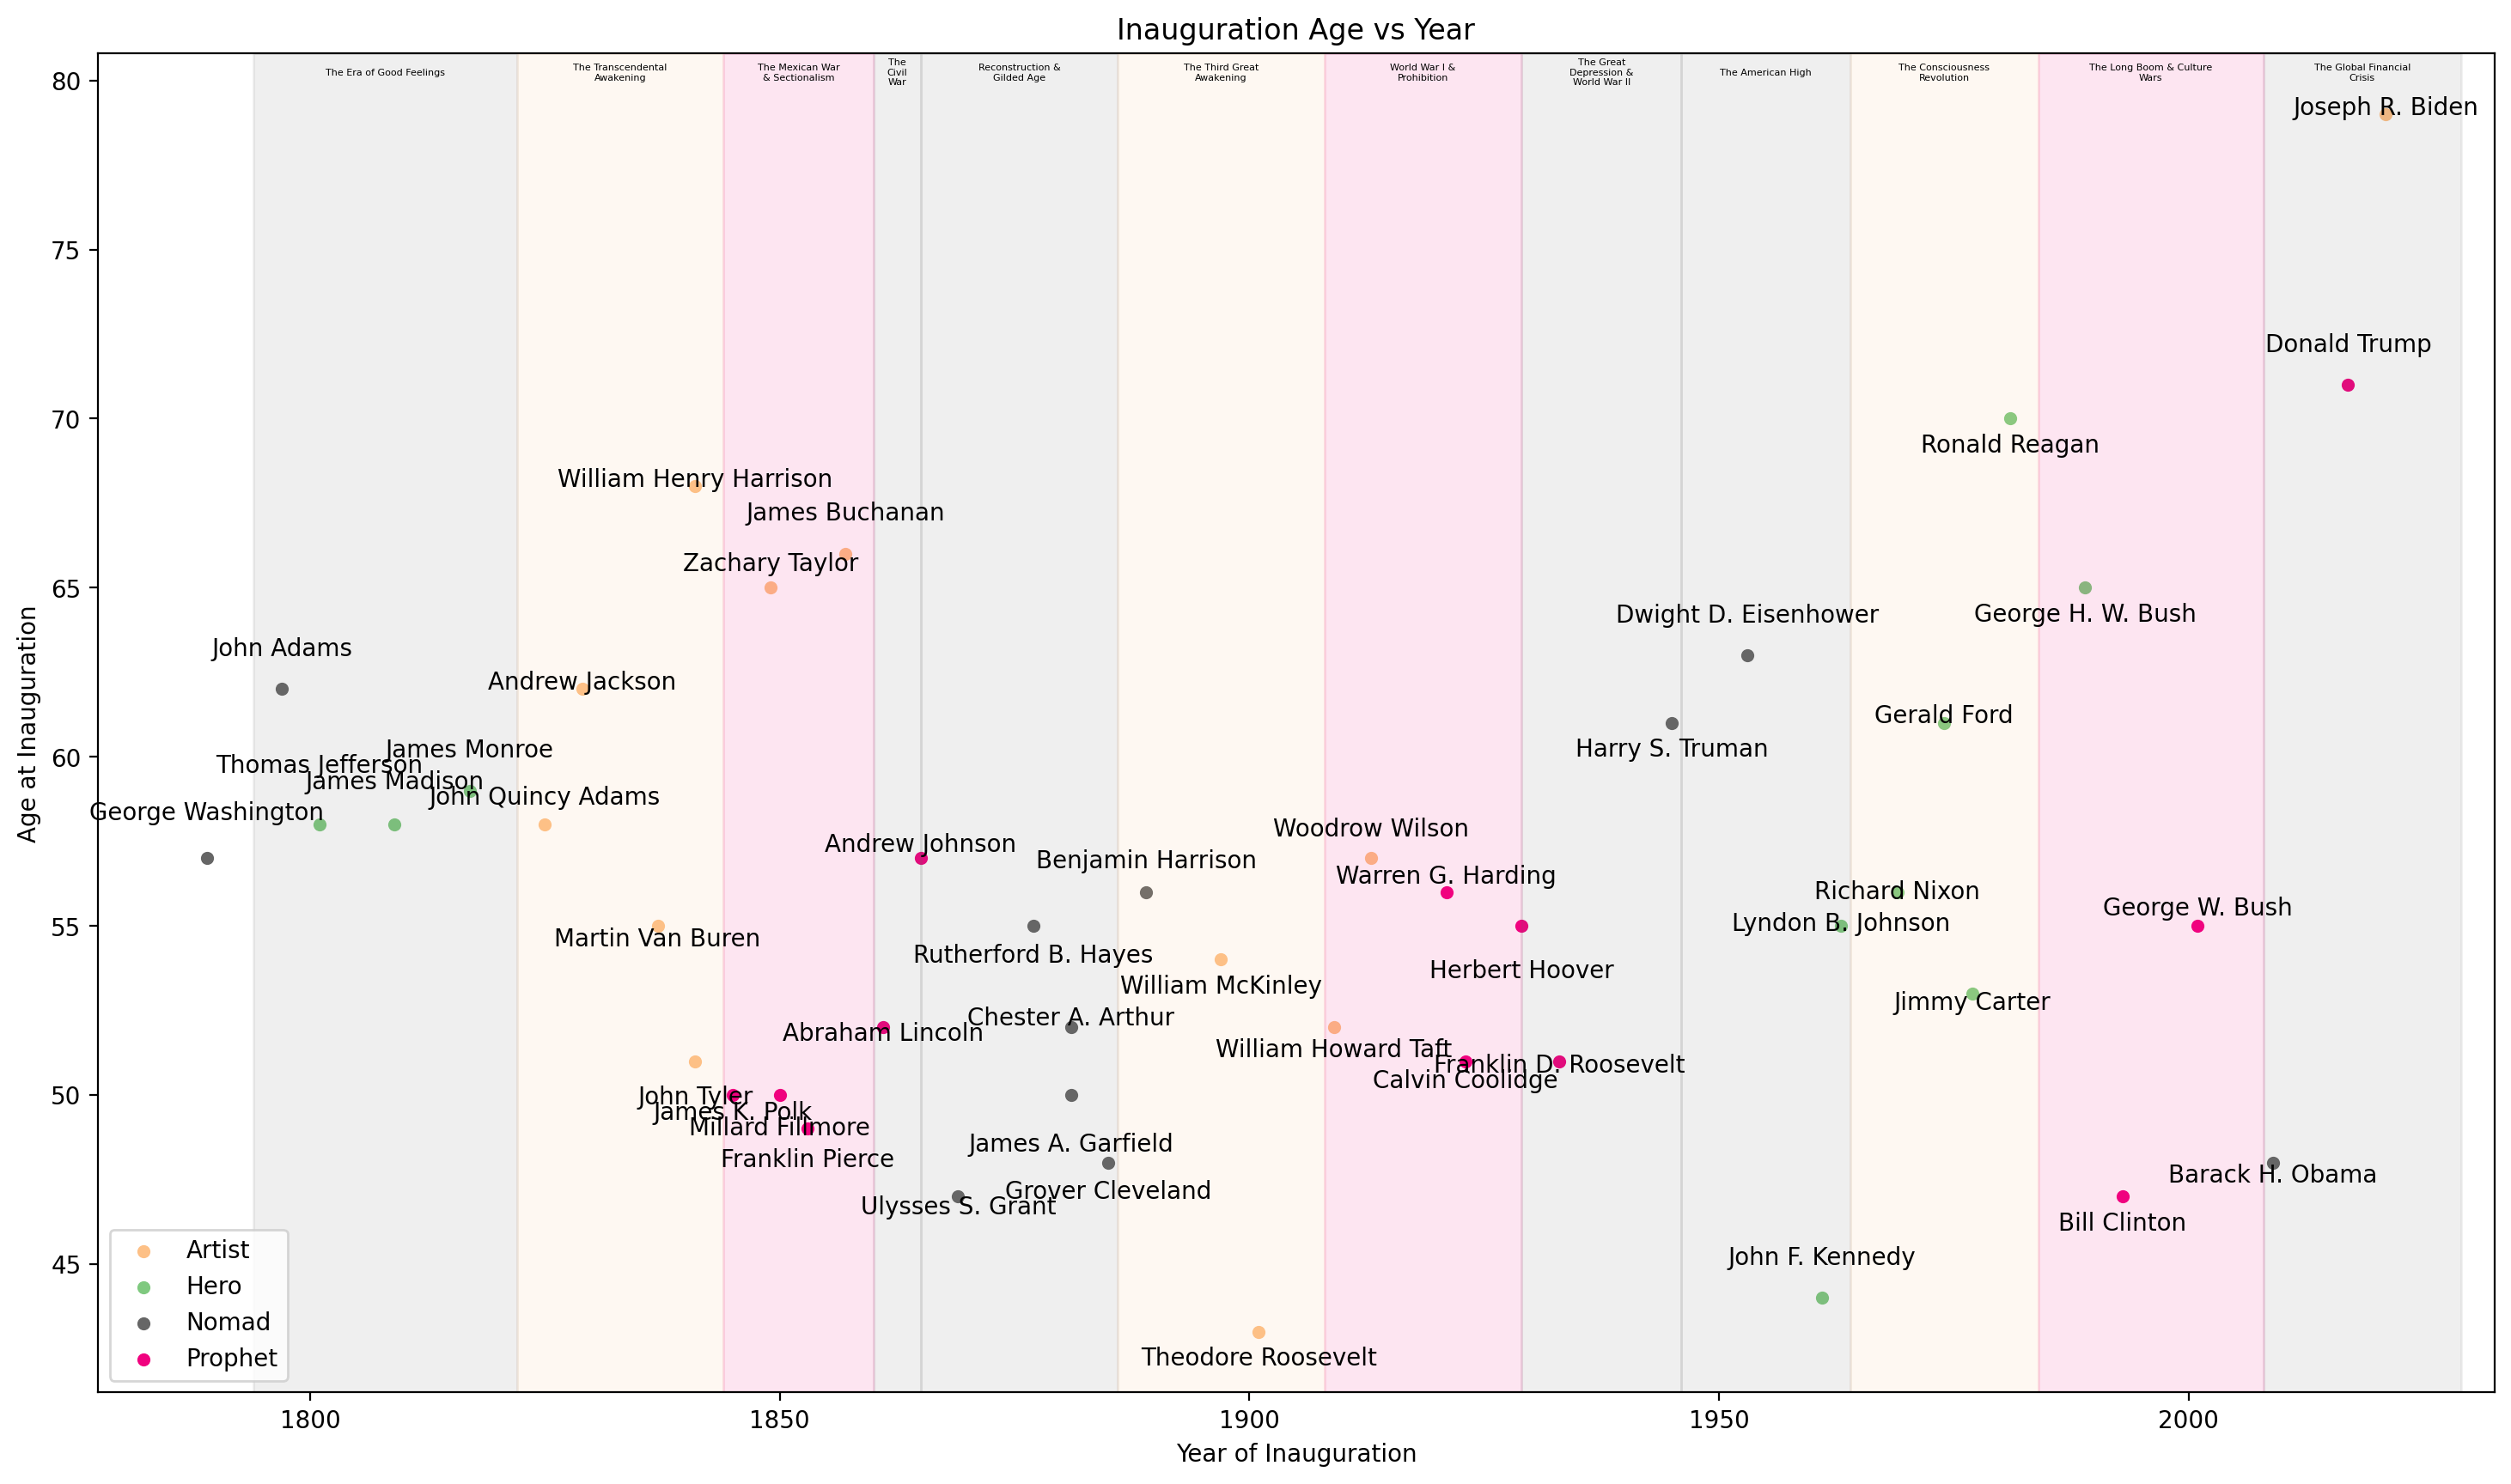

In [48]:

archetype_dict = generations_df.turnings_archetype.to_dict()
columns_list = ['turning_number', 'entering_midlife']
numbers_archetype_dict = turnings_df[columns_list].reset_index().merge(
    generations_df.turnings_archetype.reset_index(), left_on='entering_midlife', right_on='generation_name'
).set_index('turning_number').turnings_archetype.to_dict()
rows_list = []
def f(df):
    generation_name = df.generation_name.unique()[0]
    label = archetype_dict[generation_name]
    # ball_and_chain(ax=ax, index=df.year_term_begin, values=df.age_at_inauguration, c=face_color_dict[label], label=label);
    df.plot(x='year_term_begin', y='age_at_inauguration', kind='scatter', ax=ax, label=label, color=face_color_dict[label]);
    
    # Annotate all points with index
    for president_name, row_series in df.iterrows():
        # plt.annotate(president_name, (row_series.year_term_begin, row_series.age_at_inauguration), textcoords='offset points', xytext=(0, -10), ha='center')
        row_dict = {}
        row_dict['president_name'] = president_name
        row_dict['year_term_begin'] = row_series.year_term_begin
        row_dict['age_at_inauguration'] = row_series.age_at_inauguration
        rows_list.append(row_dict)

figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
columns_list = ['year_of_birth', 'year_term_begin', 'generation_name']
df = us_presidents_df.sort_values('office_rank')[columns_list]
df['turnings_archetype'] = df.generation_name.map(lambda x: archetype_dict[x])
color_cycler = nu.get_color_cycler(len(generations_df.turnings_archetype.unique()))
face_color_dict = {}
for turnings_archetype, fc_dict in zip(generations_df.turnings_archetype.unique(), color_cycler()):
    face_color_dict[turnings_archetype] = fc_dict['color']
df['age_at_inauguration'] = (df.year_term_begin - df.year_of_birth)
_ = df.groupby('turnings_archetype').apply(f)

# Annotate all points with index
df = pd.DataFrame(rows_list).set_index('president_name').sort_values('age_at_inauguration')
df['jittered'] = pd.Series(nu.get_jitter_list(df.sort_values('age_at_inauguration').age_at_inauguration), index=df.index)
for president_name, row_series in df.iterrows():
    plt.annotate(president_name, (row_series.year_term_begin, row_series.jittered), textcoords='offset points', xytext=(0, -0), ha='center')

# Add the turning names as background shading
turnings_df = nu.load_object('turnings_df')
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()
for turning_name, row_series in turnings_df.iterrows():
    turning_year_begin = row_series.turning_year_begin
    if turning_year_begin >= left:
        turning_year_end = row_series.turning_year_end
        if turning_year_end <= right:
            width = turning_year_end - turning_year_begin
            height = top - bottom
            turning_number = row_series.turning_number
            rect = Rectangle(
                (turning_year_begin, bottom), width, height, color=face_color_dict[numbers_archetype_dict[turning_number]],
                fill=True, edgecolor=None, alpha=0.1
            )
            ax.add_patch(rect)
            plt.annotate(
                textwrap.fill(turning_name, width=width), (turning_year_begin+(width/2), top), textcoords='offset points', xytext=(0, -8), ha='center',
                fontsize=4, va='center'
            )

# Set legend
legend_obj = ax.legend(loc='lower left')

# Set labels
ax.set_xlabel('Year of Inauguration')
ax.set_ylabel('Age at Inauguration')
text_obj = ax.set_title('Inauguration Age vs Year')

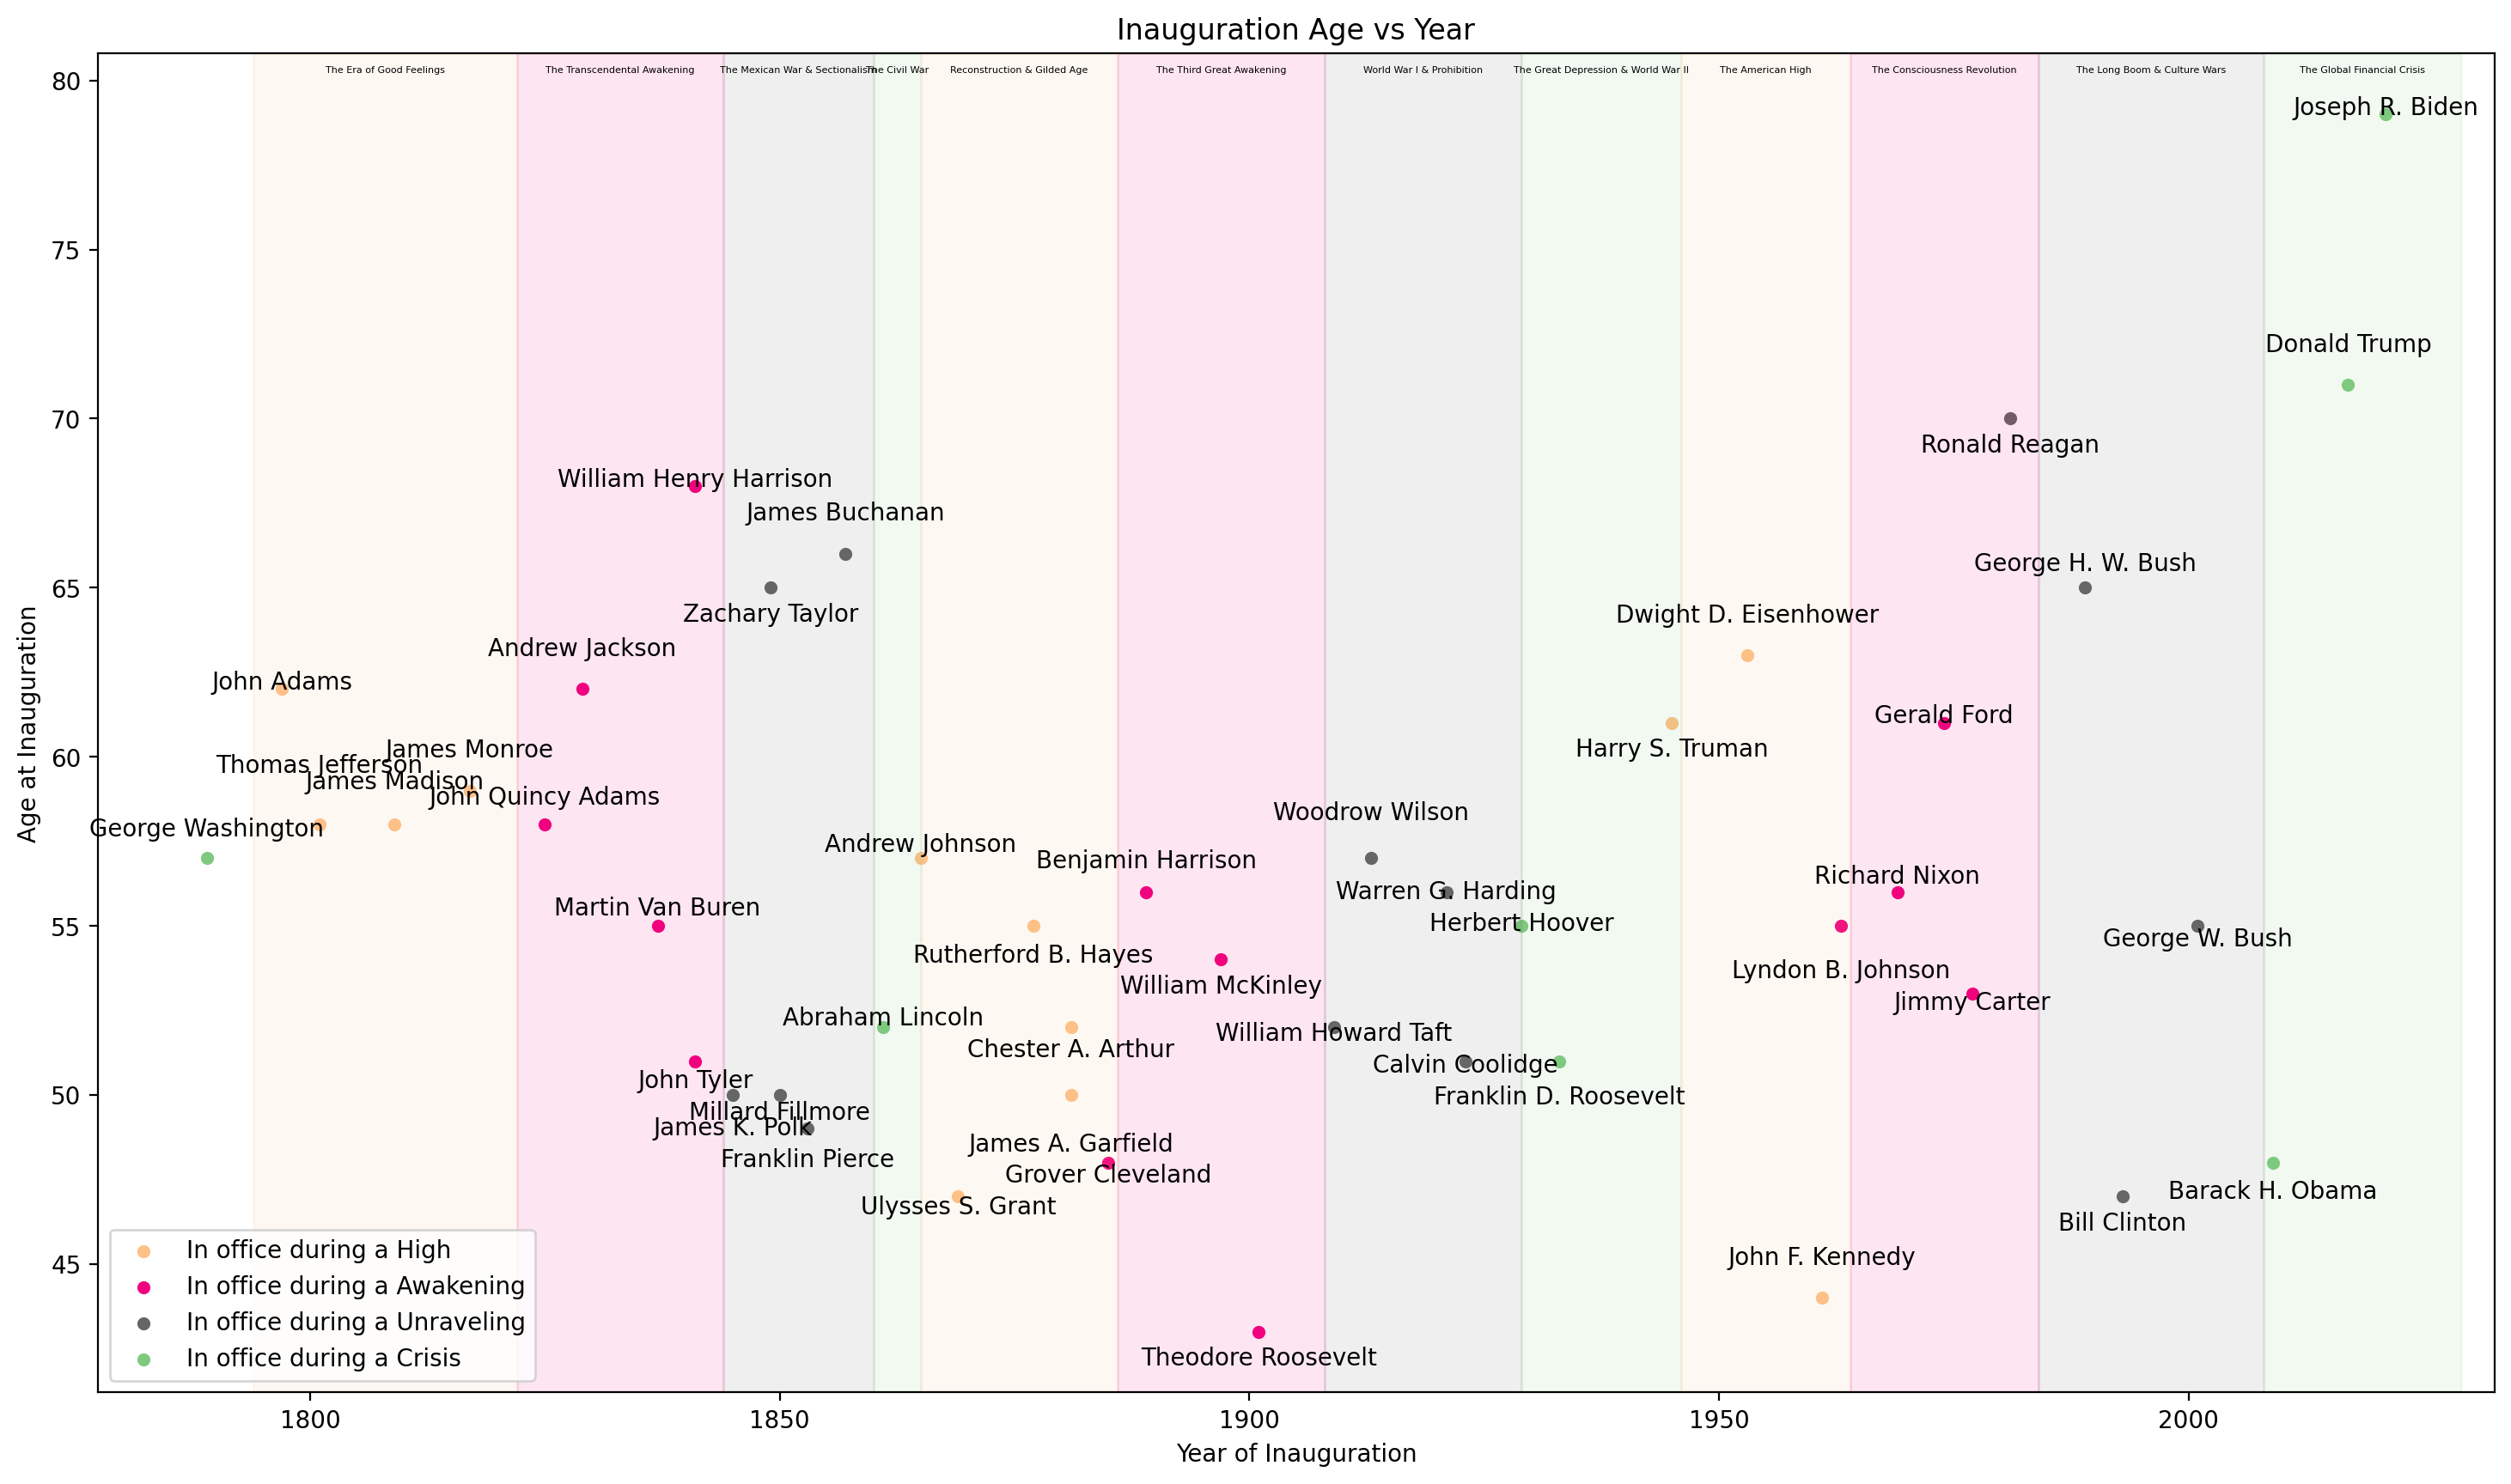

In [25]:

from matplotlib.patches import Rectangle

turning_numbers_df = nu.load_object('turning_numbers_df')
turning_type_dict = turning_numbers_df.turning_type.to_dict()
rows_list = []
def f(df):
    turning_number = df.turning_number.unique()[0]
    label = f'In office during a {turning_type_dict[turning_number]}'
    # ball_and_chain(ax=ax, index=df.year_term_begin, values=df.age_at_inauguration, c=face_color_dict[turning_number], label=label);
    df.plot(x='year_term_begin', y='age_at_inauguration', kind='scatter', ax=ax, label=label, color=face_color_dict[turning_number]);
    
    # Annotate all points with index
    for president_name, row_series in df.iterrows():
        # plt.annotate(president_name, (row_series.year_term_begin, row_series.age_at_inauguration), textcoords='offset points', xytext=(0, -10), ha='center')
        row_dict = {}
        row_dict['president_name'] = president_name
        row_dict['year_term_begin'] = row_series.year_term_begin
        row_dict['age_at_inauguration'] = row_series.age_at_inauguration
        rows_list.append(row_dict)

figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
columns_list = ['year_of_birth', 'year_term_begin', 'turning_number']
df = us_presidents_df.sort_values('office_rank')[columns_list]
color_cycler = nu.get_color_cycler(len(df.turning_number.unique()))
face_color_dict = {}
for turning_number, fc_dict in zip(df.turning_number.unique(), color_cycler()):
    face_color_dict[turning_number] = fc_dict['color']
df['age_at_inauguration'] = (df.year_term_begin - df.year_of_birth)
_ = df.groupby('turning_number').apply(f)

# Annotate all points with index
df = pd.DataFrame(rows_list).set_index('president_name').sort_values('age_at_inauguration')
df['jittered'] = pd.Series(nu.get_jitter_list(df.sort_values('age_at_inauguration').age_at_inauguration), index=df.index)
for president_name, row_series in df.iterrows():
    plt.annotate(president_name, (row_series.year_term_begin, row_series.jittered), textcoords='offset points', xytext=(0, -0), ha='center')

# Add the turning names as background shading
turnings_df = nu.load_object('turnings_df')
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()
for turning_name, row_series in turnings_df.iterrows():
    turning_year_begin = row_series.turning_year_begin
    if turning_year_begin >= left:
        turning_year_end = row_series.turning_year_end
        if turning_year_end <= right:
            width = turning_year_end - turning_year_begin
            height = top - bottom
            turning_number = row_series.turning_number
            rect = Rectangle(
                (turning_year_begin, bottom), width, height, color=face_color_dict[turning_number],
                fill=True, edgecolor=None, alpha=0.1
            )
            ax.add_patch(rect)
            plt.annotate(turning_name, (turning_year_begin+(width/2), top), textcoords='offset points', xytext=(0, -8), ha='center', fontsize=4)

# Set legend
legend_obj = ax.legend(loc='lower left')

# Set labels
ax.set_xlabel('Year of Inauguration')
ax.set_ylabel('Age at Inauguration')
text_obj = ax.set_title('Inauguration Age vs Year')

In [ ]:

if nu.pickle_exists('sienna_expert_poll2010_df'):
    sienna_expert_poll2010_df = nu.load_object('sienna_expert_poll2010_df')
else:
    tables_url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'
    tables_list = get_page_tables(tables_url)


    cn_dict = {}
    cn_dict['Bg'] = 'Background'
    cn_dict['PL'] = 'Party_Leadership'
    cn_dict['CAb'] = 'Communication_Ability'
    cn_dict['RC'] = 'Relations_With_Congress'
    cn_dict['CAp'] = 'Court_Appointments'
    cn_dict['HE'] = 'Handling_of_Economy'
    cn_dict['L'] = 'Luck'
    cn_dict['AC'] = 'Ability_to_Compromise'
    cn_dict['WR'] = 'Willing_to_Take_Risks'
    cn_dict['EAp'] = 'Executive_Appointments'
    cn_dict['OA'] = 'Overall_Ability'
    cn_dict['Im'] = 'Imagination'
    cn_dict['DA'] = 'Domestic_Accomplishments'
    cn_dict['Int'] = 'Integrity'
    cn_dict['EAb'] = 'Executive_Ability'
    cn_dict['FPA'] = 'Foreign_Policy_Accomplishments'
    cn_dict['LA'] = 'Leadership_Ability'
    cn_dict['IQ'] = 'Intelligence'
    cn_dict['AM'] = 'Avoid_Crucial_Mistakes'
    cn_dict['EV'] = 'Experts_View'
    cn_dict['O'] = 'Overall'
    cn_dict['Seq.'] = 'Office_Rank'
    cn_dict['President'] = 'President'
    cn_dict['Political party'] = 'Political_Party'


    sienna_expert_poll2010_df = tables_list[6].copy()
    sienna_expert_poll2010_df.columns = [cn_dict[cn].lower() for cn in sienna_expert_poll2010_df.columns]
    sienna_expert_poll2010_df = sienna_expert_poll2010_df.iloc[1:-1]
    sienna_expert_poll2010_df = sienna_expert_poll2010_df.applymap(lambda x: str(x).split('[')[0])
    for cn in sienna_expert_poll2010_df.columns:
        if cn not in ['president', 'political_party']:
            sienna_expert_poll2010_df[cn] = sienna_expert_poll2010_df[cn].map(lambda x: re.sub('[^\d]+', '', str(x)))
            sienna_expert_poll2010_df[cn] = pd.to_numeric(sienna_expert_poll2010_df[cn], errors='coerce')
    sienna_expert_poll2010_df.set_index('president', inplace=True)
    sienna_expert_poll2010_df.index.name = 'President'
    f = lambda x: f'presidential_{x}' if ('_' not in x) else x
    sienna_expert_poll2010_df.columns = [f(cn) for cn in sienna_expert_poll2010_df.columns]
    sienna_expert_poll2010_df.loc['Grover Cleveland', 'office_rank'] = 24
    pn_dict = {'William H. Taft': 'William Howard Taft', 'Barack Obama': 'Barack H. Obama'}
    sienna_expert_poll2010_df = sienna_expert_poll2010_df.rename(index=pn_dict)
    nu.store_objects(sienna_expert_poll2010_df=sienna_expert_poll2010_df)
sienna_expert_poll2010_df.sample(5).T

In [ ]:

offending_str = 'reign'
reign_regex = re.compile(f'(?:\\b|_){offending_str}')
columns_dict = {cn: cn.replace(offending_str, 'term') for cn in us_presidents_df.columns if bool(reign_regex.search(cn))}
if len(columns_dict):
    nu.store_objects(us_presidents_df=us_presidents_df.rename(columns=columns_dict))

In [ ]:

set(us_presidents_df.index).symmetric_difference(set(sienna_expert_poll2010_df.index))

In [ ]:

if 'executive_ability' not in us_presidents_df.columns:
    us_presidents_df = us_presidents_df.merge(sienna_expert_poll2010_df, left_index=True, right_index=True, how='left')
    nu.store_objects(us_presidents_df=us_presidents_df)
[f'us_presidents_df.{fn}' for fn in dir(us_presidents_df) if 'dup' in fn.lower()]

In [ ]:

if 'office_rank_y' in us_presidents_df.columns:
    print(us_presidents_df.duplicated(subset=['office_rank_x', 'office_rank_y']).any())

In [ ]:

if 'office_rank_y' in us_presidents_df.columns:
    us_presidents_df = us_presidents_df.drop(columns=['office_rank_y']).rename(columns={'office_rank_x': 'office_rank'})
    nu.store_objects(us_presidents_df=us_presidents_df)

In [ ]:

mask_series = (us_presidents_df.index == 'Joseph R. Biden')
assert us_presidents_df.loc[mask_series, 'political_party'].squeeze() == 'Democratic'

In [ ]:

us_presidents_df.tail(5).T

In [ ]:

[f'us_presidents_df.{fn}' for fn in dir(us_presidents_df) if 'cor' in fn.lower()]

In [ ]:

us_presidents_df.columns.tolist()

In [ ]:

# Get numeric columns
df = get_column_descriptions(us_presidents_df)
mask_series = df.dtype.isin(['int8', 'int64', 'float64'])
numeric_columns_list = df[mask_series].column_name.tolist()

In [ ]:

import numpy as np

max_corr = 0
max_row = np.nan
max_col = np.nan
us_presidents_df['office_rank'] = pd.to_numeric(us_presidents_df['office_rank'], errors='coerce')
corr_df = us_presidents_df[numeric_columns_list].corr()
old_columns = ['office_rank', 'turning_number', 'birth_year_begin', 'birth_year_end', 'turning_year_begin',
               'turning_year_end']
new_columns = ['presidential_background', 'presidential_imagination', 'presidential_integrity',
               'presidential_intelligence', 'presidential_luck', 'willing_to_take_risks', 'ability_to_compromise',
               'executive_ability', 'leadership_ability', 'communication_ability', 'overall_ability', 'party_leadership',
               'relations_with_congress', 'court_appointments', 'handling_of_economy', 'executive_appointments',
               'domestic_accomplishments', 'foreign_policy_accomplishments', 'avoid_crucial_mistakes', 'experts_view',
               'presidential_overall']
mask_series = corr_df.index.isin(new_columns)
for row_index, row_series in corr_df[mask_series].iterrows():
    for col_index, col_value in row_series.items():
        if (col_index in old_columns) and (col_value < 1.0) and (col_value > max_corr):
            max_corr = col_value
            max_row = row_index
            max_col = col_index
print("us_presidents_df.plot.scatter(x='{}', y='{}');".format(max_row, max_col))

In [ ]:

columns_list = ['office_rank', 'generation_name', 'turning_name', 'turning_number', 'political_party',
                'presidential_integrity', 'avoid_crucial_mistakes', 'experts_view', 'presidential_overall',
                'birth_year_begin', 'birth_year_end', 'turning_year_begin', 'turning_year_end']
us_presidents_df[columns_list].sort_values('presidential_integrity').tail(5).T

In [ ]:

columns_list = ['office_rank', 'generation_name', 'turning_name', 'turning_number', 'political_party',
                'presidential_integrity', 'avoid_crucial_mistakes', 'experts_view', 'presidential_overall',
                'birth_year_begin', 'birth_year_end', 'turning_year_begin', 'turning_year_end']
us_presidents_df[columns_list].sort_values('avoid_crucial_mistakes').tail(5).T

In [ ]:

get_column_descriptions(us_presidents_df)

In [ ]:

us_presidents_df[numeric_columns_list].var().sort_values()

In [ ]:

def display_by_year_of_inauguration(y_column_name='handling_of_economy', y_column_description='Handling of Economy'):
    fig, ax = plt.subplots(figsize=(18, 7))
    def f(df):
        turning_number = df.turning_number.unique()[0]
        label = f'In office during a {turning_type_dict[turning_number]}'
        ball_and_chain(ax=ax, index=df.year_term_begin, values=df[y_column_name], c=face_color_dict[turning_number], label=label)

        # Annotate all points with index
        for president_name, row_series in df.iterrows():
            plt.annotate(president_name, (row_series.year_term_begin, row_series[y_column_name]), textcoords='offset points', xytext=(0, -10), ha='center')

    columns_list = [y_column_name, 'year_term_begin', 'turning_number']
    df = us_presidents_df.sort_values('office_rank')[columns_list]
    color_cycler = nu.get_color_cycler(len(df.turning_number.unique()))
    face_color_dict = {}
    for turning_number, fc_dict in zip(df.turning_number.unique(), color_cycler()):
        face_color_dict[turning_number] = fc_dict['color']
    _ = df.groupby('turning_number').apply(f)

    # Set legend
    legend_obj = ax.legend(loc='upper left')

    # Set labels
    ax.set_xlabel('Year of Inauguration')
    ax.set_ylabel(y_column_description)
    text_obj = ax.set_title(f'{y_column_description} by Inauguration Year')

In [ ]:

display_by_year_of_inauguration(y_column_name='handling_of_economy', y_column_description='Handling of Economy')

In [ ]:

display_by_year_of_inauguration(y_column_name='presidential_imagination', y_column_description='Presidential Imagination')

In [ ]:

mask_series = (us_presidents_df.index == 'Joseph R. Biden')
us_presidents_df[mask_series].dropna(axis='columns', how='all').T

In [ ]:

us_presidents_df.sort_values('office_rank').generation_name.map(lambda x: archetype_dict[x])